In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install geopandas
! pip install contextily

In [2]:
import requests
import numpy as np
import pandas as pd
import glob
from zipfile import ZipFile
import geopandas as gpd
import contextily as ctx

In [4]:
# for year in ['2019', '2020', '2021']:
#   for month in range(1, 7):
#     time = f"{year}0{month}"
#     r = requests.get(f"https://s3.amazonaws.com/tripdata/{time}-citibike-tripdata.csv.zip")
#     with open(f'/content/drive/MyDrive/ml_project/{time}.csv.zip', 'wb') as f:
#       f.write(r.content)

In [3]:
file_list = glob.glob('/content/drive/MyDrive/ml_project/*.csv.zip')
for file in file_list:
    # opening the zip file in READ mode
    with ZipFile(file, 'r') as zip:
        zip.extractall()
        print('Done extracting', file, "...")

Done extracting /content/drive/MyDrive/ml_project/201901.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/201902.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/201903.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/201904.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/201905.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/201906.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/202001.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/202002.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/202003.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/202004.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/202005.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/202006.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/202101.csv.zip ...
Done extracting /content/drive/MyDrive/ml_project/202102.csv.zip ...
Done extracting /content/drive/MyD

In [5]:
from psutil import virtual_memory

In [6]:
data = pd.DataFrame()

csvs = glob.glob('*.csv')
for f in csvs:
    d = pd.read_csv(f)
    month = f.split("-")[0]
    if int(month) > 202101:        
        d = d.rename(columns={"started_at":"starttime","ended_at":"stoptime","start_station_id": "start station id","start_station_name": "start station name","start_lat": "start station latitude","start_lng": "start station longitude","end_station_id": "end station id","end_station_name": "end station name","end_lat": "end station latitude","end_lng": "end station longitude"})
    if data.shape[0] > 0:
        data = data.append(d)
    else:
        data = d
    print('Done append', f, "...")
    ram_gb = virtual_memory().total / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done append 202106-citibike-tripdata.csv ...
Your runtime has 27.3 gigabytes of available RAM

Done append 202001-citibike-tripdata.csv ...
Your runtime has 27.3 gigabytes of available RAM



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done append 202102-citibike-tripdata.csv ...
Your runtime has 27.3 gigabytes of available RAM

Done append 201902-citibike-tripdata.csv ...
Your runtime has 27.3 gigabytes of available RAM

Done append 202101-citibike-tripdata.csv ...
Your runtime has 27.3 gigabytes of available RAM

Done append 201901-citibike-tripdata.csv ...
Your runtime has 27.3 gigabytes of available RAM

Done append 202002-citibike-tripdata.csv ...
Your runtime has 27.3 gigabytes of available RAM

Done append 201906-citibike-tripdata.csv ...
Your runtime has 27.3 gigabytes of available RAM

Done append 202005-citibike-tripdata.csv ...
Your runtime has 27.3 gigabytes of available RAM

Done append 202004-citibike-tripdata.csv ...
Your runtime has 27.3 gigabytes of available RAM

Done append 201903-citibike-tripdata.csv ...
Your runtime has 27.3 gigabytes of available RAM

Done append 202003-citibike-tripdata.csv ...
Your runtime has 27.3 gigabytes of available RAM

Done append 201905-citibike-tripdata.csv ...
Your 

In [7]:
data.head()

,ride_id,rideable_type,starttime,stoptime,start station name,start station id,end station name,end station id,start station latitude,start station longitude,end station latitude,end station longitude,member_casual,tripduration,bikeid,usertype,birth year,gender
0,6339C86D47EC0FAB,docked_bike,2021-06-02 17:18:45,2021-06-02 17:26:17,W 51 St & 6 Ave,6740.1,E 66 St & Madison Ave,6969.08,40.760659,-73.980420,40.768009,-73.968453,member,NaN,NaN,NaN,NaN,NaN
1,CDE3C147775B4002,docked_bike,2021-06-04 21:01:46,2021-06-04 21:32:09,W 56 St & 10 Ave,6955.01,E 9 St & Avenue C,5616.01,40.768254,-73.988639,40.725213,-73.977688,member,NaN,NaN,NaN,NaN,NaN
2,D335C3F6B412B846,docked_bike,2021-06-15 16:39:36,2021-06-15 16:55:02,E 56 St & Madison Ave,6732.01,E 16 St & 5 Ave,6022.04,40.761573,-73.972628,40.737262,-73.992390,member,NaN,NaN,NaN,NaN,NaN
3,8DA6810777C89735,docked_bike,2021-06-08 11:36:40,2021-06-08 11:39:41,E 68 St & 3 Ave,6896.16,1 Ave & E 62 St,6753.08,40.767128,-73.962246,40.761227,-73.960940,member,NaN,NaN,NaN,NaN,NaN
4,62D9B66A3A1D9FDF,docked_bike,2021-06-18 12:48:43,2021-06-18 13:04:14,E 48 St & 5 Ave,6626.01,W 20 St & 8 Ave,6224.05,40.757245,-73.978059,40.743453,-74.000040,member,NaN,NaN,NaN,NaN,NaN


In [8]:
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])
data["tripminute"] = (data['stoptime'] - data['starttime']).dt.total_seconds() // 60

In [9]:
data['start hour']=data['starttime'].dt.hour.astype('category')
data['start day']=data['starttime'].dt.day.astype('category') 
data['weekday']=data['starttime'].dt.weekday.astype('category')
data['weekend'] = [d >= 5 for d in data['weekday']] # 0=monday
data['start date']=data['starttime'].dt.date.astype('category')

### Check if the behaviour changed pre-, during, post- pandemic

In [10]:
data_2019 = data[data["starttime"] < pd.to_datetime("2020-01-01")]
data_2020 = data[(data["starttime"] > pd.to_datetime("2019-12-31")) & (data["starttime"] < pd.to_datetime("2021-01-01"))]
data_2021 = data[data["starttime"] > pd.to_datetime("2020-12-31")]

In [11]:
data_2019.shape

(9055018, 24)

In [12]:
data_2020.shape

(7508808, 24)

In [13]:
data_2021.shape

(11245774, 24)

Text(0.5, 1.0, '2021')

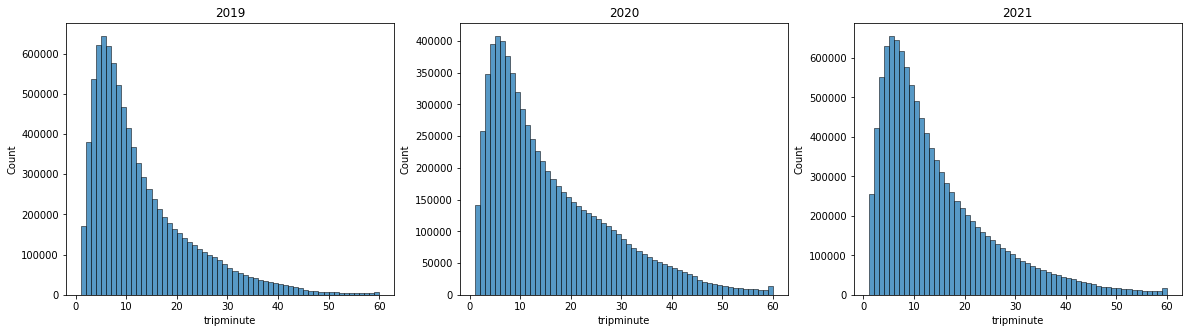

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
sns.histplot(data=data_2019,x="tripminute", bins=range(1,61), ax=ax1)
ax1.set_title("2019")
sns.histplot(data=data_2020,x="tripminute", bins=range(1,61), ax=ax2)
ax2.set_title("2020")
sns.histplot(data=data_2021,x="tripminute", bins=range(1,61), ax=ax3)
ax3.set_title("2021")


Text(0.5, 1.0, '2021')

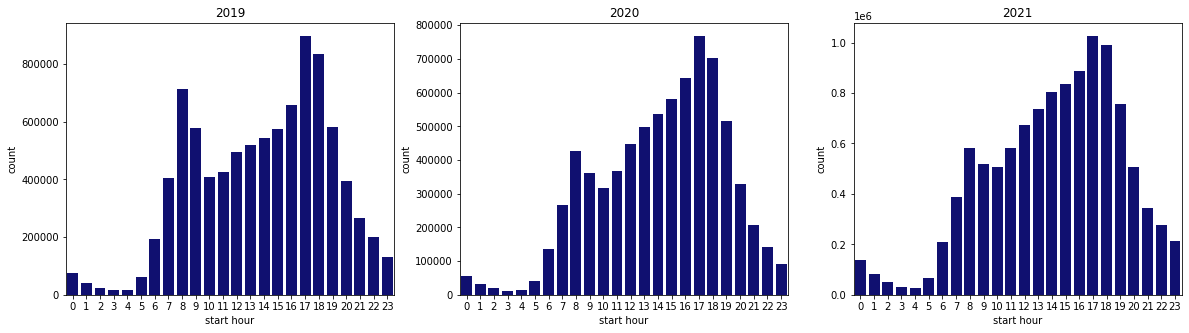

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
sns.countplot(data=data_2019, x="start hour", color="navy", ax=ax1)
ax1.set_title("2019")
sns.countplot(data=data_2020, x="start hour", color="navy", ax=ax2)
ax2.set_title("2020")
sns.countplot(data=data_2021, x="start hour", color="navy", ax=ax3)
ax3.set_title("2021")

Text(0.5, 1.0, '2021')

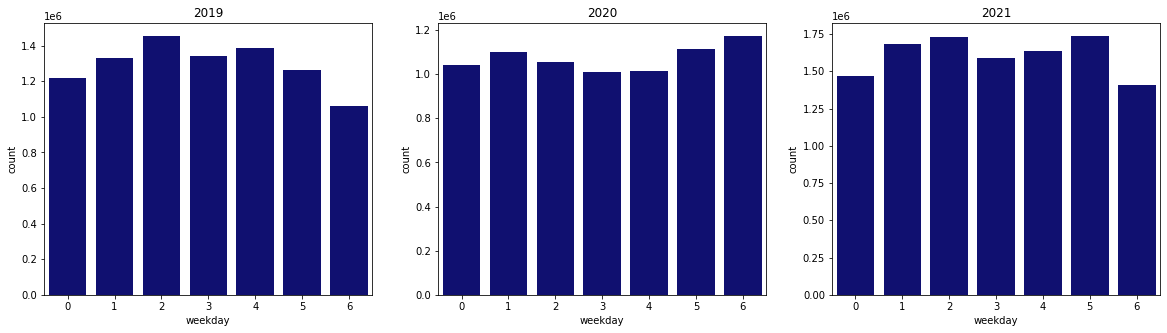

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
sns.countplot(data=data_2019, x="weekday", color="navy", ax=ax1)
ax1.set_title("2019")
sns.countplot(data=data_2020, x="weekday", color="navy", ax=ax2)
ax2.set_title("2020")
sns.countplot(data=data_2021, x="weekday", color="navy", ax=ax3)
ax3.set_title("2021")

Text(0.5, 1.0, '2021')

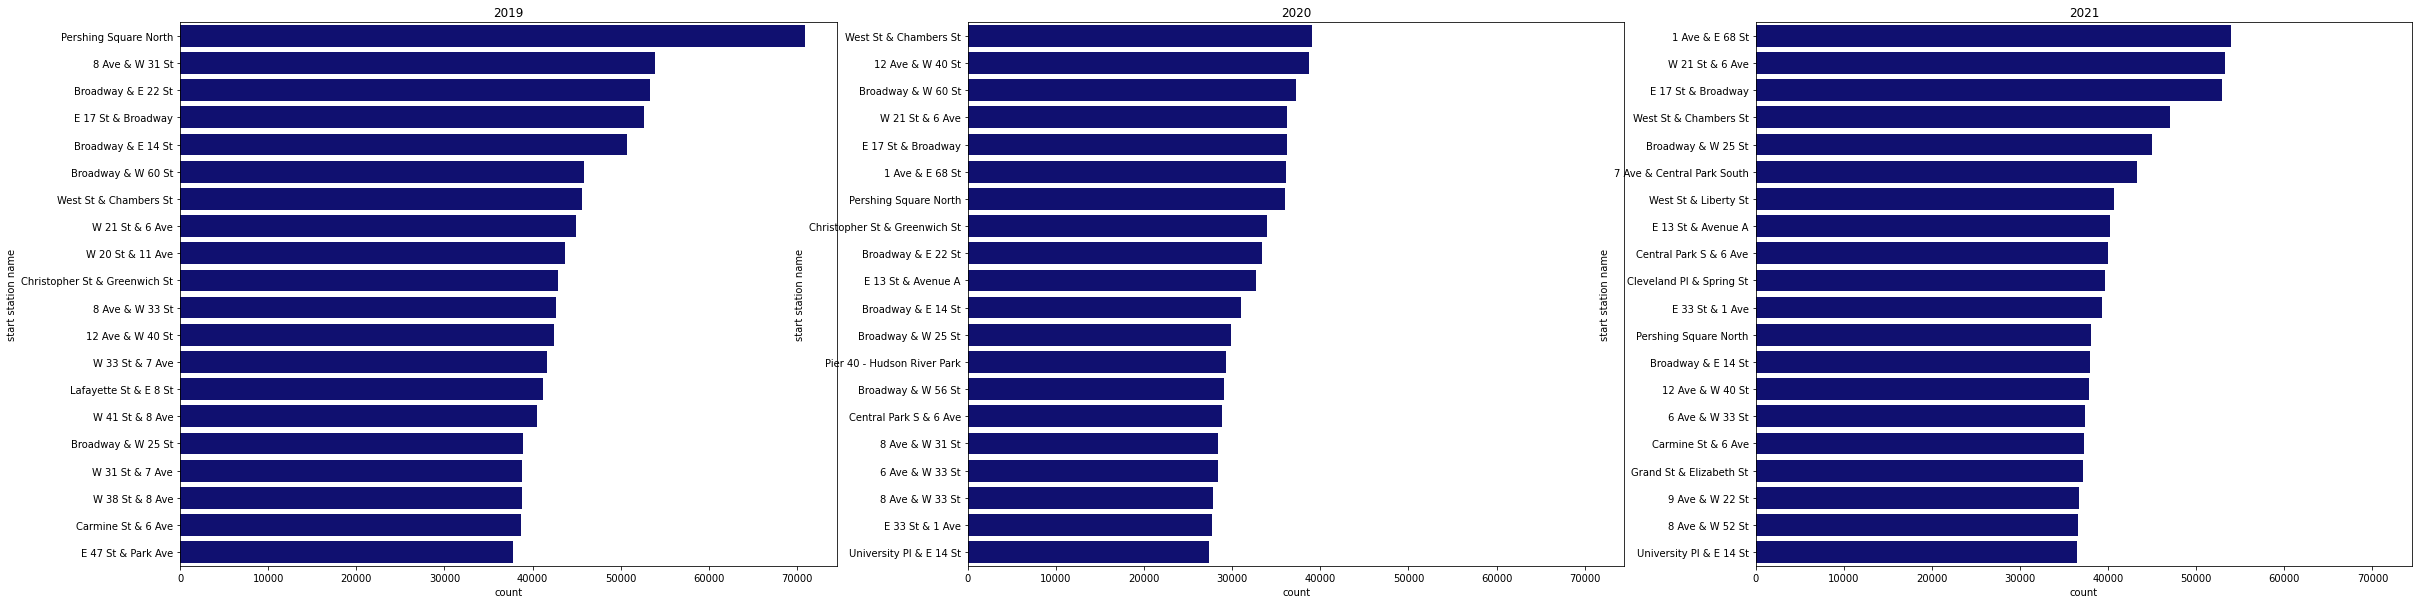

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40, 10), sharex=True)
sns.countplot(data=data_2019, y="start station name", order=data_2019["start station name"].value_counts()[:20].index, color="navy", ax=ax1)
ax1.set_title("2019")
sns.countplot(data=data_2020, y="start station name", order=data_2020["start station name"].value_counts()[:20].index, color="navy", ax=ax2)
ax2.set_title("2020")
sns.countplot(data=data_2021, y="start station name", order=data_2021["start station name"].value_counts()[:20].index, color="navy", ax=ax3)
ax3.set_title("2021")

Text(0.5, 1.0, '2021')

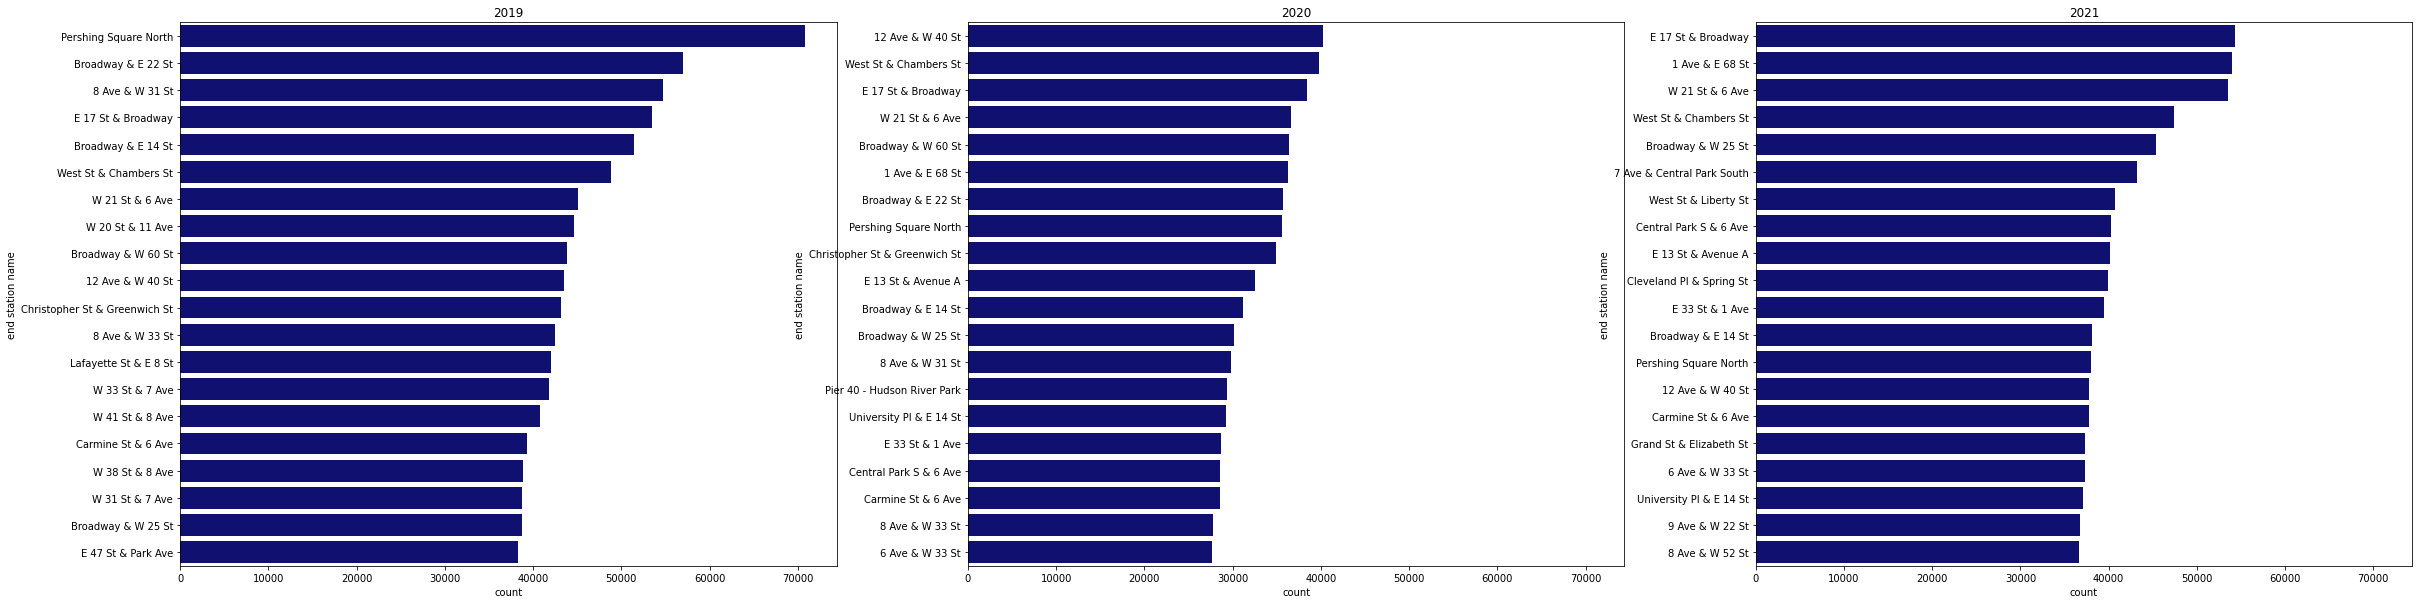

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40, 10), sharex=True)
sns.countplot(data=data_2019, y="end station name", order=data_2019["end station name"].value_counts()[:20].index, color="navy", ax=ax1)
ax1.set_title("2019")
sns.countplot(data=data_2020, y="end station name", order=data_2020["end station name"].value_counts()[:20].index, color="navy", ax=ax2)
ax2.set_title("2020")
sns.countplot(data=data_2021, y="end station name", order=data_2021["end station name"].value_counts()[:20].index, color="navy", ax=ax3)
ax3.set_title("2021")

### citibike traffic flow map


The longtitude and latitude is not very accurate in the records, sometimes the same docker station has different longtitude and latitude. The station id also changes in different years. Thus, we used station information from "https://gbfs.citibikenyc.com/gbfs/en/station_information.json".

In [57]:
import json

In [86]:
r = requests.get(f"https://gbfs.citibikenyc.com/gbfs/en/station_information.json")
stations_list = r.json()["data"]["stations"]

In [88]:
stations = pd.DataFrame(stations_list, columns=['capacity',
   'eightd_has_key_dispenser',
   'eightd_station_services',
   'electric_bike_surcharge_waiver',
   'external_id',
   'has_kiosk',
   'lat',
   'legacy_id',
   'lon',
   'name',
   'region_id',
   'rental_methods',
   'rental_uris',
    'ios',
   'short_name',
   'station_id',
   'station_type'])

In [93]:
stations.shape

(1570, 18)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  import sys


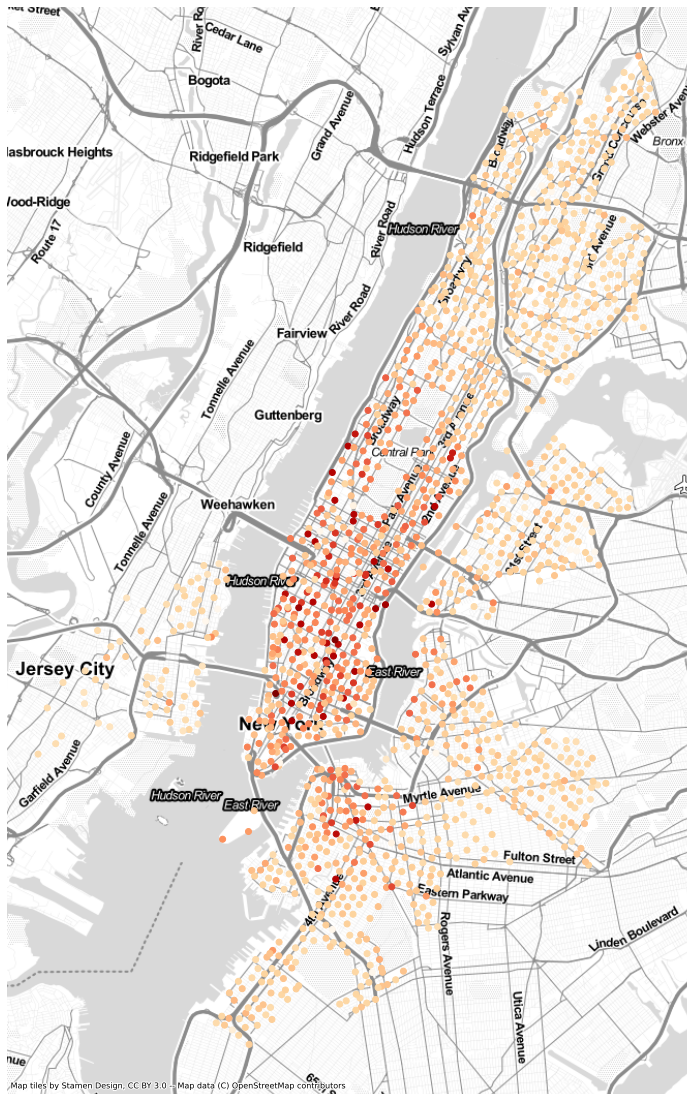

In [103]:
stations_geo = gpd.GeoDataFrame(
    stations, geometry=gpd.points_from_xy(stations["lon"], stations["lat"]))
stations_geo.crs = "EPSG:4326"

stations_geo = stations_geo.to_crs(epsg=3857)
ax = stations_geo.plot(figsize=(20, 20), column='capacity', cmap='OrRd')
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

In [144]:
stations_geo['tile_ID'] = stations_geo['station_id']

In [147]:
stations_geo = stations_geo.to_crs(epsg=4326)

In [ ]:
!apt-get install -qq curl g++ make
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
import os
os.chdir('spatialindex-src-1.8.5')
!./configure
!make
!make install
!pip install rtree
!ldconfig
!pip install scikit-mobility

In [120]:
import skmob

In [153]:
flow_2019 = data_2019[["starttime", "start station name", "end station name"]].groupby(by=["start station name", "end station name"]).count().reset_index().rename(columns={"starttime": "flow"})
flow_2019 = flow_2019.merge(stations, left_on="start station name", right_on="name")
flow_2019 = flow_2019[["flow", "start station name", "end station name", "station_id"]].rename(columns={"station_id": "origin"})
flow_2019 = flow_2019.merge(stations, left_on="end station name", right_on="name")
flow_2019 = flow_2019[["flow", "origin", "station_id"]].rename(columns={"station_id": "destination"})
flow_2019.nlargest(500, 'flow').to_csv("flow_2019.csv", index=False)
fdf = skmob.FlowDataFrame.from_file("flow_2019.csv",
				tessellation=stations_geo,
				tile_id='tile_ID')
# print a portion of the flows
print(fdf.head())
fdf.plot_flows(flow_color='red')

   flow origin destination
0  4041    432        3263
1  3127   2006        2006
2  2593    519         492
3  2574   3423        3423
4  2386   3093         460


In [154]:
flow_2020 = data_2020[["starttime", "start station name", "end station name"]].groupby(by=["start station name", "end station name"]).count().reset_index().rename(columns={"starttime": "flow"})
flow_2020 = flow_2020.merge(stations, left_on="start station name", right_on="name")
flow_2020 = flow_2020[["flow", "start station name", "end station name", "station_id"]].rename(columns={"station_id": "origin"})
flow_2020 = flow_2020.merge(stations, left_on="end station name", right_on="name")
flow_2020 = flow_2020[["flow", "origin", "station_id"]].rename(columns={"station_id": "destination"})
flow_2020.nlargest(500, 'flow').to_csv("flow_2020.csv", index=False)
fdf = skmob.FlowDataFrame.from_file("flow_2020.csv",
				tessellation=stations_geo,
				tile_id='tile_ID')
# print a portion of the flows
print(fdf.head())
fdf.plot_flows(flow_color='red')

   flow origin destination
0  5858   3423        3423
1  3524   3881        3881
2  2810   2006        2006
3  2706    514         514
4  2608   3782        3782


In [155]:
flow_2021 = data_2021[["starttime", "start station name", "end station name"]].groupby(by=["start station name", "end station name"]).count().reset_index().rename(columns={"starttime": "flow"})
flow_2021 = flow_2021.merge(stations, left_on="start station name", right_on="name")
flow_2021 = flow_2021[["flow", "start station name", "end station name", "station_id"]].rename(columns={"station_id": "origin"})
flow_2021 = flow_2021.merge(stations, left_on="end station name", right_on="name")
flow_2021 = flow_2021[["flow", "origin", "station_id"]].rename(columns={"station_id": "destination"})
flow_2021.nlargest(500, 'flow').to_csv("flow_2021.csv", index=False)
fdf = skmob.FlowDataFrame.from_file("flow_2021.csv",
				tessellation=stations_geo,
				tile_id='tile_ID')
# print a portion of the flows
print(fdf.head())
fdf.plot_flows(flow_color='red')

   flow origin destination
0  5342   2006        2006
1  4950   3724        3724
2  3833   3137        3137
3  3817   4037        4037
4  3435   3423        3423


Conslusion: before and after pandemic, bike behavior in new york do have big changes.

### Get weather data